In [1]:
import numpy as np 
import pandas as pd 
import datetime 
%matplotlib inline
import matplotlib

In [2]:
import os 
os.chdir(r"D:\PYTHON\Dataset")

In [3]:
bank = pd.read_pickle('all_banks')  

In [4]:
bank.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [5]:
bank.shape

(2517, 30)

In [6]:
bank.columns

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])

In [7]:
bank.xs('High', level=1, axis=1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.18,493.80,129.44,40.36,58.49,31.98
2006-01-04,47.24,491.00,128.91,40.14,59.28,31.82
2006-01-05,46.83,487.80,127.32,39.81,58.59,31.56
2006-01-06,46.91,489.00,129.25,40.24,58.85,31.78
2006-01-09,46.97,487.40,130.62,40.72,59.29,31.82
...,...,...,...,...,...,...
2015-12-24,17.38,52.97,183.17,66.89,32.71,55.09
2015-12-28,17.23,52.57,181.93,66.45,32.36,54.78
2015-12-29,17.35,53.22,184.18,67.30,32.70,55.35


In [8]:
bank.xs('Close', level=1, axis=1).min()

Bank Ticker
BAC     3.14
C       4.52
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
dtype: float64

In [9]:
returns=pd.DataFrame()

In [10]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [11]:
for x in tickers:
    returns[x +' Return']=bank.xs('Close' , axis=1,level=1)[x]  #here xs means ecesss
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


- Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.

In [12]:
for x in tickers:
    returns[x+'Return'] = bank.xs('Close' , axis=1,level=1)[x].pct_change()    # pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [13]:
import seaborn as sns
sns.set_style('whitegrid')

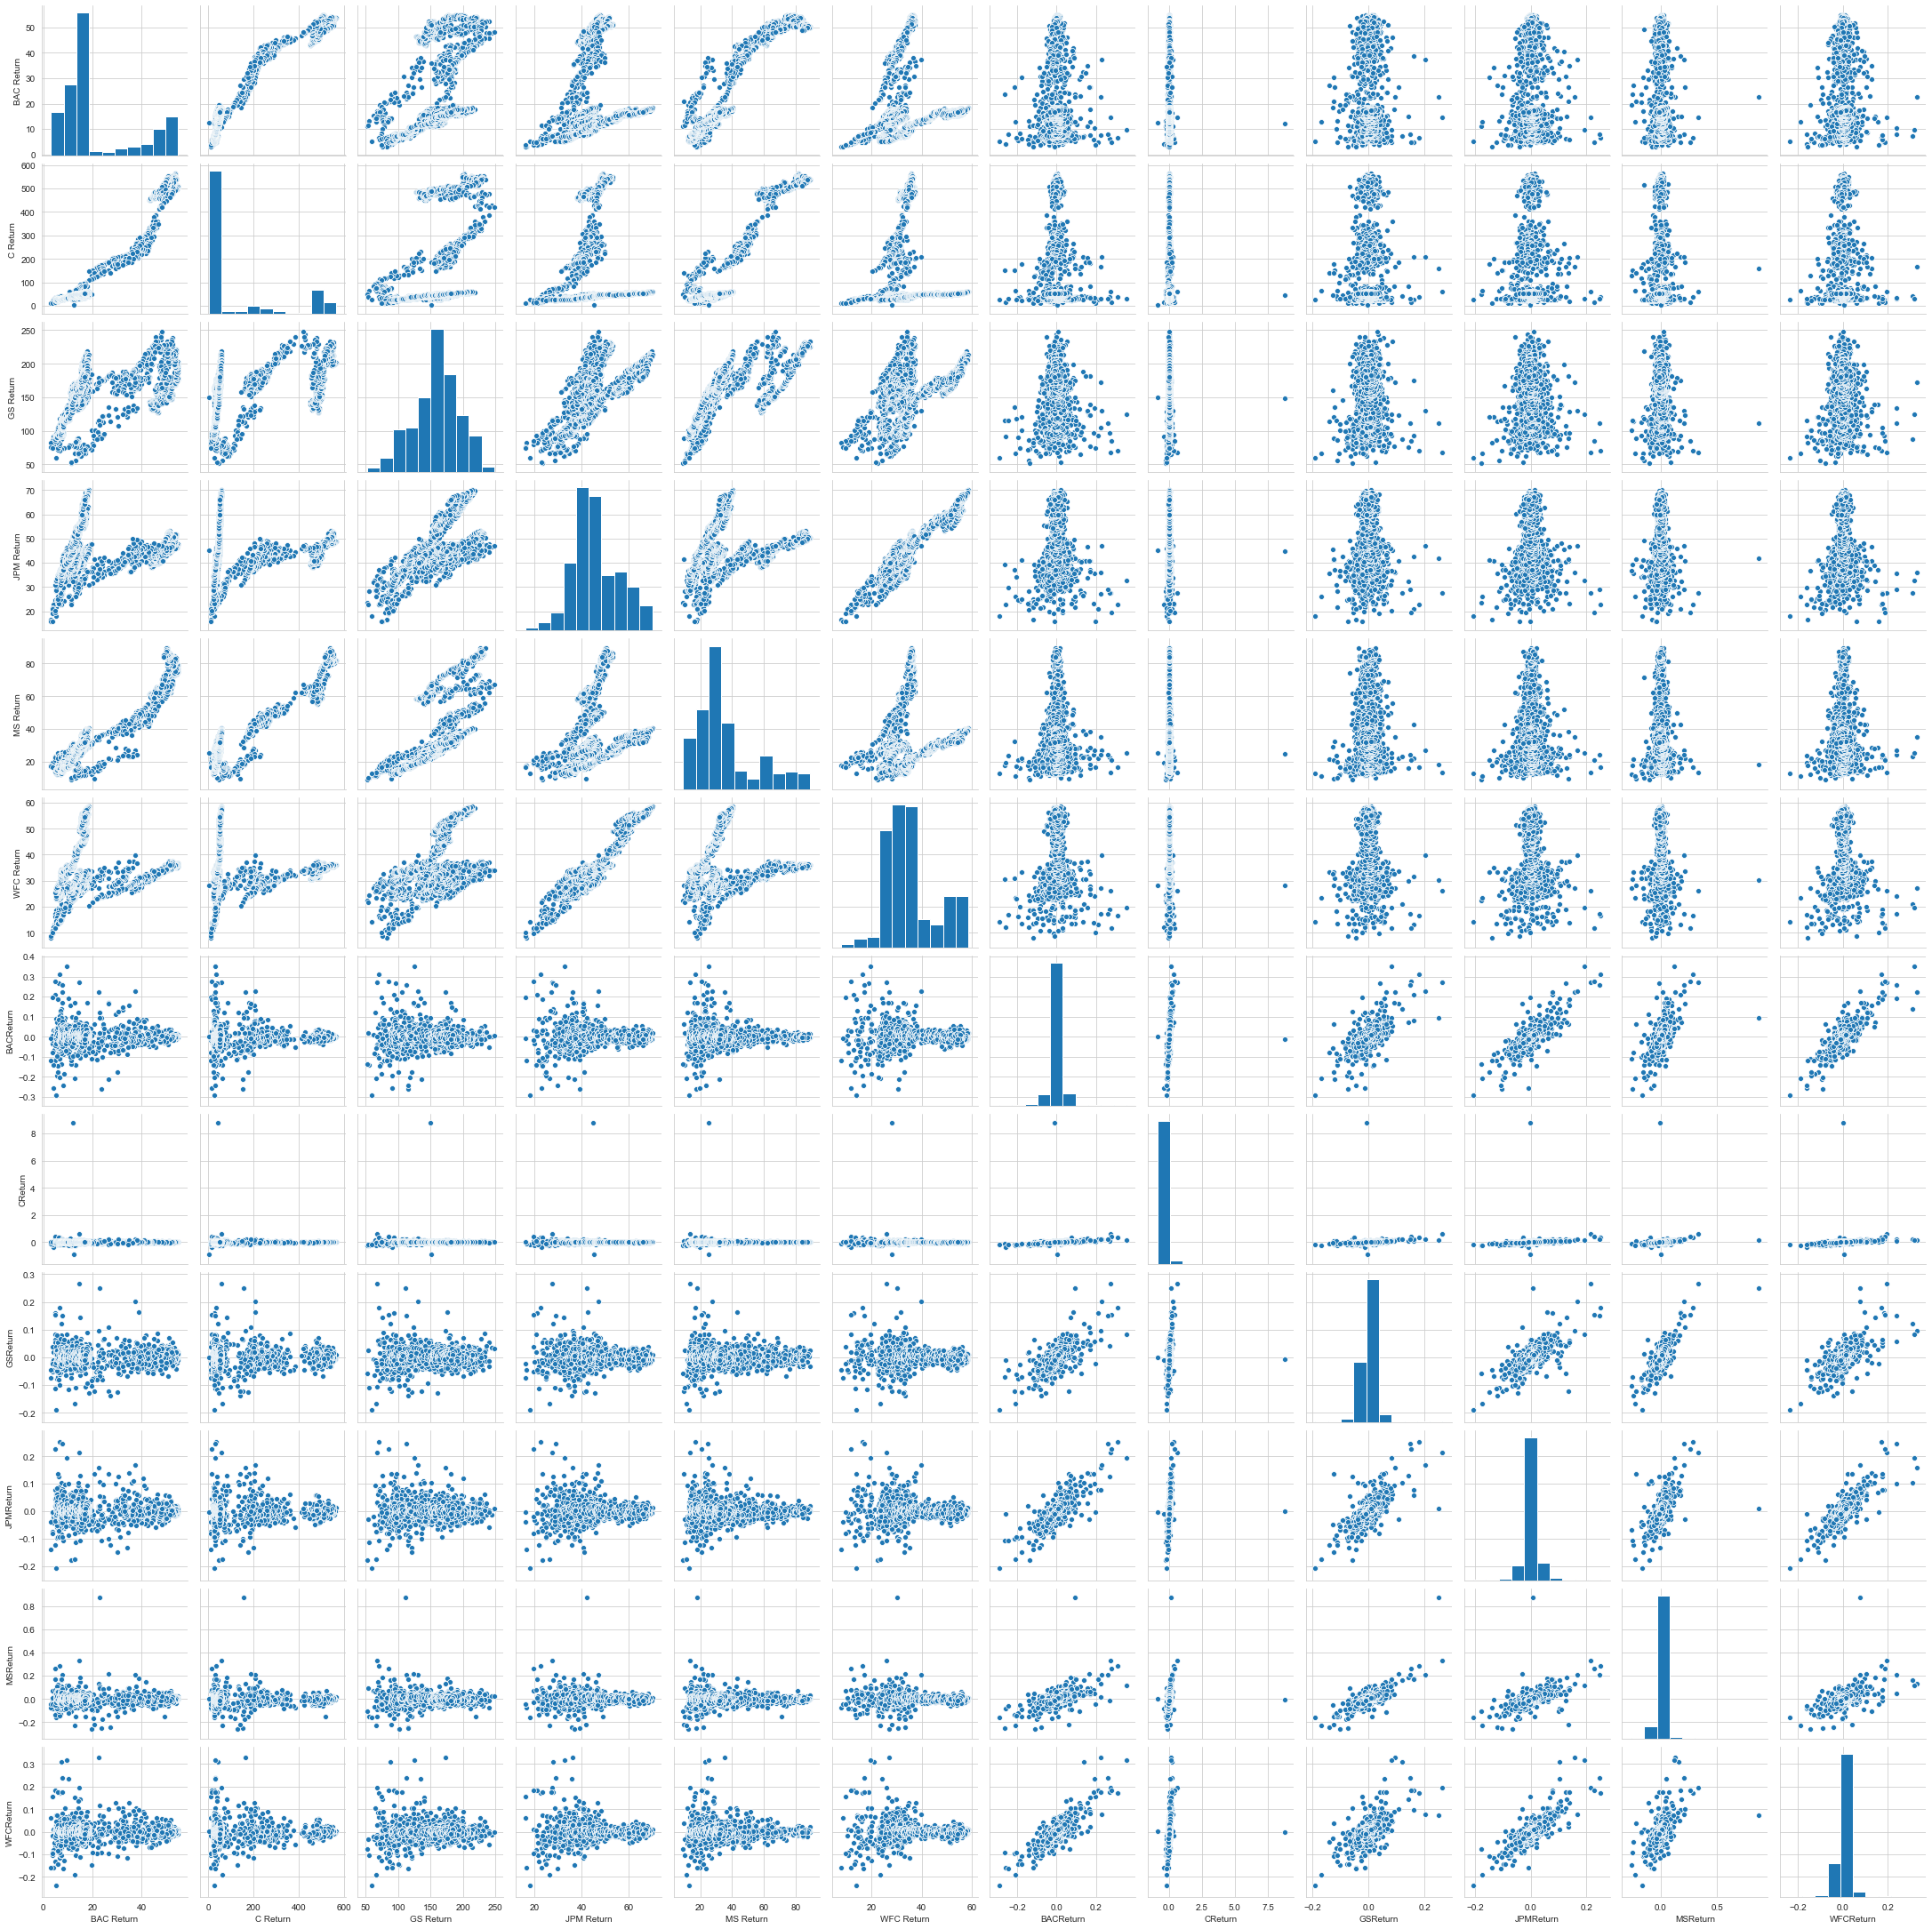

In [14]:
sns.pairplot(returns[1:])  # here will not give an zero because inplace of zero here 

- idxmin() finctions returns index of first occuernce of minimum over requested axis 

In [15]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,,,,,,,
2006-01-03,47.08,492.90,128.87,40.19,58.31,31.90,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,46.58,483.80,127.09,39.62,58.35,31.53,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,46.64,486.20,127.04,39.74,58.51,31.50,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,46.57,486.20,128.84,40.02,58.57,31.68,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,46.60,483.90,130.39,40.67,59.19,31.68,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,17.27,52.71,182.47,66.60,32.48,54.82,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,17.13,52.38,181.62,66.38,32.17,54.68,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,17.28,52.98,183.53,67.07,32.55,55.29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [16]:
returns.idxmin()

BAC Return   2009-03-06
C Return     2011-05-06
GS Return    2008-11-20
JPM Return   2009-03-09
MS Return    2008-11-20
WFC Return   2009-03-05
BACReturn    2009-01-20
CReturn      2011-05-06
GSReturn     2009-01-20
JPMReturn    2009-01-20
MSReturn     2008-10-09
WFCReturn    2009-01-20
dtype: datetime64[ns]

In [17]:
returns.idxmax()

BAC Return   2006-11-16
C Return     2006-12-27
GS Return    2007-10-31
JPM Return   2015-07-22
MS Return    2007-06-14
WFC Return   2015-07-22
BACReturn    2009-04-09
CReturn      2011-05-09
GSReturn     2008-11-24
JPMReturn    2009-01-21
MSReturn     2008-10-13
WFCReturn    2008-07-16
dtype: datetime64[ns]

In [18]:
returns.std()

BAC Return     15.304852
C Return      177.409683
GS Return      35.638164
JPM Return      9.839705
MS Return      18.669476
WFC Return     10.012581
BACReturn       0.036650
CReturn         0.179969
GSReturn        0.025346
JPMReturn       0.027656
MSReturn        0.037820
WFCReturn       0.030233
dtype: float64

In [19]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return     0.828268
C Return       2.721360
GS Return     11.230525
JPM Return     3.680196
MS Return      2.479580
WFC Return     1.901856
BACReturn      0.016163
CReturn        0.015289
GSReturn       0.014046
JPMReturn      0.014017
MSReturn       0.016249
WFCReturn      0.012591
dtype: float64

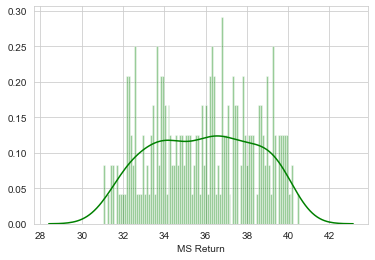

In [20]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=100,color='green')  #here a line is kde

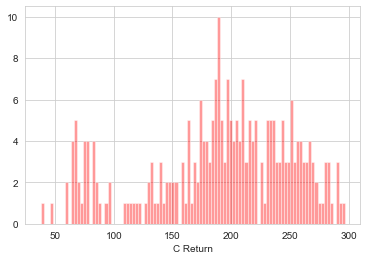

In [21]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=100,color='red',kde=False)

# more visuliazation

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports


In [23]:
# pip install plotly
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True) 

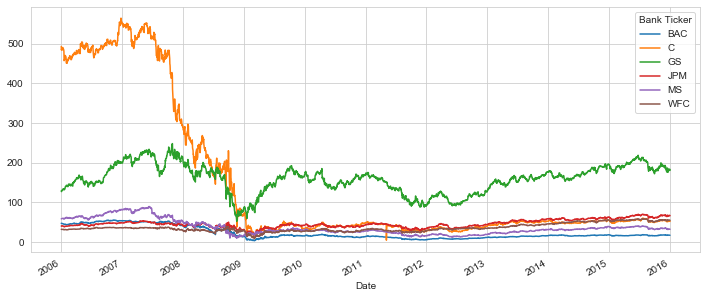

In [24]:
bank.xs('Close',axis=1,level=1).plot(figsize=(12,5))

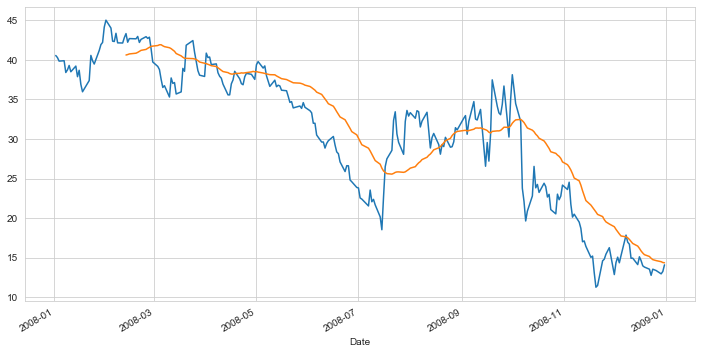

In [25]:
bank.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].plot(figsize=(12,6),label='BofA Close')
rolling_avg = pd.DataFrame()
rolling_avg['30 Day Avg'] = bank.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].rolling(window=30).mean()
rolling_avg['30 Day Avg'].plot(figsize=(12,6),label='30 Day Avg')
# plt.legend()

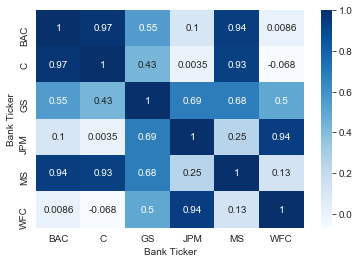

In [26]:
sns.heatmap(bank.xs('Close',axis=1,level=1).corr(),annot=True,cmap='Blues')

In [27]:
bank.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2008-01-02,40.56,289.2,207.60,42.17,50.95,29.10
2008-01-03,40.30,289.3,204.84,41.88,50.94,28.52
2008-01-04,39.85,282.4,199.93,40.93,49.30,27.49
2008-01-07,39.90,282.6,194.73,41.34,48.31,27.68
2008-01-08,38.41,271.4,189.50,39.70,46.40,26.50
...,...,...,...,...,...,...
2008-12-24,13.53,67.8,76.44,29.85,14.50,27.48
2008-12-26,13.36,67.3,75.97,29.80,14.65,27.51
2008-12-29,12.94,65.7,76.56,29.78,14.90,27.83


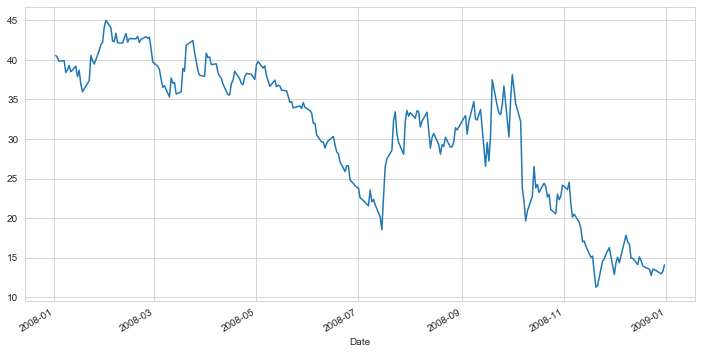

In [28]:
bank.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC'].plot(figsize=(12,6),label="Bofa Close")

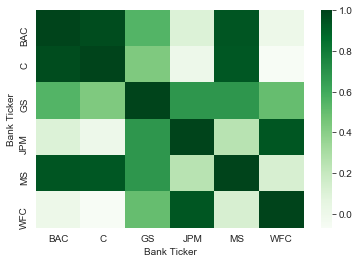

In [29]:
sns.heatmap(bank.xs('Close',axis=1,level=1).corr(),annot=False,cmap='Greens')  # annot means show the values of color 

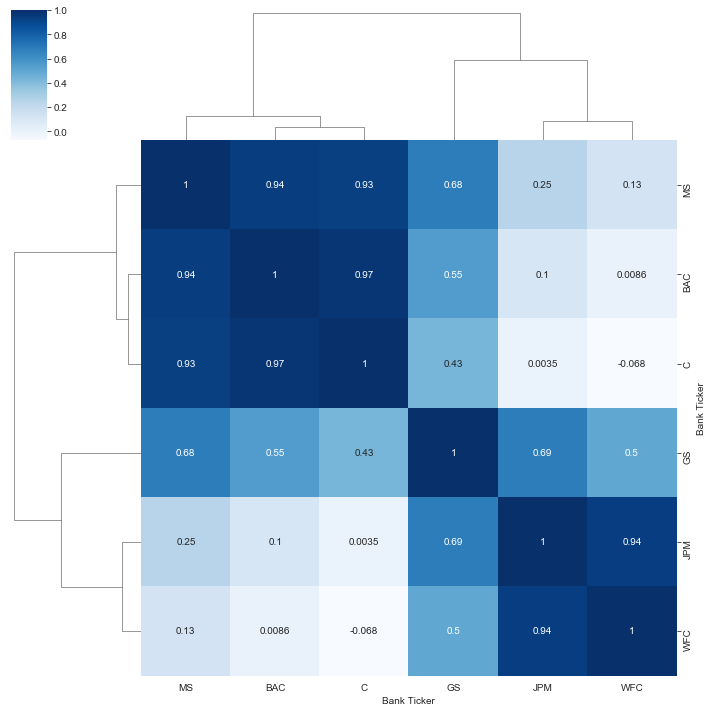

In [30]:
sns.clustermap(bank.xs('Close',axis=1,level=1).corr(),annot=True,cmap='Blues')